# Modeling Topics

In [2]:
# IMPORTS
import pandas as pd 
from pathlib import Path

# For LDA Topic Models
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA

# For NMF Topic Models
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

In [ ]:
# CUSTOM FUNCTIONS

# To see the x number of top words in a topic:
def display_topics(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "{:d}: ".format(topic_idx)
        message += " ".join([feature_names[i] + ' ' + str(round(topic[i], 2)) + ','
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

# To use this function: display_topics(model, vocabulary, N_topics)

In [4]:
# DATA
screenplays = []
for p in Path('../queue/scifi/').glob('*.txt'):
    with open(p, encoding="utf8", errors='ignore') as f:
        contents = f.read()
        screenplays.append(contents)

# While we're at it, let's grab file names
titles= []
for p in Path('../queue/scifi/').glob('*.txt'):
    with open(p, encoding="utf8", errors='ignore') as f:
        title = p.name[:-4]
        titles.append(title)

# Check our work
print(len(screenplays))
print(len(titles))

155
155


## Iterative Processes

### LDA Topic Model

In [5]:
# Create a basic DTM (no parameters)
# in order to see how many possible dimensions we have
vectorizer = CountVectorizer( )

# fit the model to the data 
dtm = vectorizer.fit_transform(screenplays)

# We'll need these later
vocabulary = vectorizer.get_feature_names_out()

# This will repeat our screenplay count
# but also report our overall vocabulary FOR ALL SCREENPLAYS
dtm.shape

(155, 54106)

In [6]:
# See what the DTM looks like:
# Load up a dataframe with our DTM
df = pd.DataFrame(dtm.toarray(), 
                  columns = vocabulary)

# Check our work:
df.shape
df.head()

,00,000,0000,000001,000047,0002921,000321252,00032125262632,0004212232,00065,...,zzz,zzzaaaappp,zzzap,zzzwhap,zzzzing,zzzzz,zzzzzz,zzzzzzam,zzzzzzzz,zzzzzzzzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
lda = LDA(n_components=21,
          max_iter=5,
          random_state=0)

model = lda.fit_transform(dtm)

In [10]:
# REMINDER: display_topics(model, vocabulary, N_topics)
display_topics(lda, vocabulary, 5)

0: the 84928.71, to 28014.03, and 26442.45, of 24760.13, in 17340.39,
1: gutteral 0.05, embarrassedly 0.05, zzzzzzzzzzzzzz 0.05, eventually 0.05, every 0.05,
2: the 4122.69, to 1561.75, you 1287.29, and 1161.76, of 1021.25,
3: the 1947.45, nick 953.3, to 616.89, victor 603.04, and 516.44,
4: the 4209.43, max 1056.38, of 992.81, to 789.26, and 758.16,
5: the 2686.48, graham 1135.95, to 903.73, and 862.18, it 723.07,
6: the 16565.6, and 5889.54, to 5690.57, of 4474.52, it 4207.53,
7: the 9841.78, and 3659.02, to 3502.71, of 2471.14, you 2293.39,
8: gutteral 0.05, embarrassedly 0.05, zzzzzzzzzzzzzz 0.05, eventually 0.05, every 0.05,
9: the 35067.59, to 13240.23, and 11575.52, of 10506.85, you 7758.95,
10: ben 667.18, reed 600.02, victor 373.4, sue 350.47, johnny 291.76,
11: gutteral 0.05, embarrassedly 0.05, zzzzzzzzzzzzzz 0.05, eventually 0.05, every 0.05,
12: the 20794.35, and 7642.12, to 7498.92, of 5845.56, in 4236.85,
13: the 11580.05, to 3885.77, and 3479.99, of 3172.01, his 2624.11

### NMF Topic Model

Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

```
tf-idf = tf * idf
idf(t) = log [ n / (df(t) + 1) ])
```

In [11]:
# Let's run a minimal change of parameters
# and words that occur in only one text
# NOTA BENE: We are using the same variable names as above 

# Create a basic DTM (no parameters)
# in order to see how many possible dimensions we have
vectorizer = TfidfVectorizer(lowercase = True,
                             min_df = 2,
                             stop_words='english')

# fit the model to the data 
dtm = vectorizer.fit_transform(screenplays)

# We'll need these later
vocabulary = vectorizer.get_feature_names_out()

# see how many features we have
dtm.shape

(155, 29177)

In [12]:
# First topic model: NMF
nmf = NMF(n_components=16, 
          random_state=1, 
          max_iter=500, 
          init='nndsvd').fit(dtm)
nmf_W = nmf.transform(dtm)
nmf_H = nmf.components_
nmf_W.shape

(155, 16)

In [13]:
display_topics(nmf, vocabulary, 10)

0: int 0.43, like 0.31, continued 0.31, looks 0.3, ext 0.26, cont 0.25, just 0.25, night 0.24, room 0.22, man 0.22,
1: sam 1.31, chris 0.4, jill 0.18, jeremy 0.14, ashley 0.13, mike 0.09, randy 0.09, dell 0.09, bret 0.08, john 0.07,
2: kirk 1.18, spock 0.71, enterprise 0.24, chekov 0.22, mccoy 0.19, uhura 0.18, decker 0.17, sulu 0.17, khan 0.14, nero 0.1,
3: luke 0.88, han 0.5, leia 0.4, threepio 0.33, vader 0.31, artoo 0.23, chewie 0.2, lando 0.18, falcon 0.16, imperial 0.11,
4: ripley 1.21, wren 0.21, john 0.18, hicks 0.18, newt 0.17, anthony 0.13, burke 0.12, alien 0.09, hudson 0.08, perez 0.07,
5: sarah 1.05, john 0.56, terminator 0.51, reese 0.31, malcolm 0.18, mary 0.13, roland 0.11, night 0.11, 1000 0.1, chico 0.09,
6: picard 0.95, riker 0.29, worf 0.29, geordi 0.26, borg 0.2, data 0.18, enterprise 0.16, soran 0.15, beverly 0.11, troi 0.09,
7: logan 1.17, jessica 0.32, magneto 0.2, jean 0.14, cyclops 0.14, creed 0.14, francis 0.13, kelly 0.1, hines 0.1, contid 0.09,
8: kay 0.86,

## Estimation Process

In [26]:
# IMPORT
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] = 300

In [24]:
wcss = [] 
for i in range(1, 30): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dtm) 
    wcss.append(kmeans.inertia_)

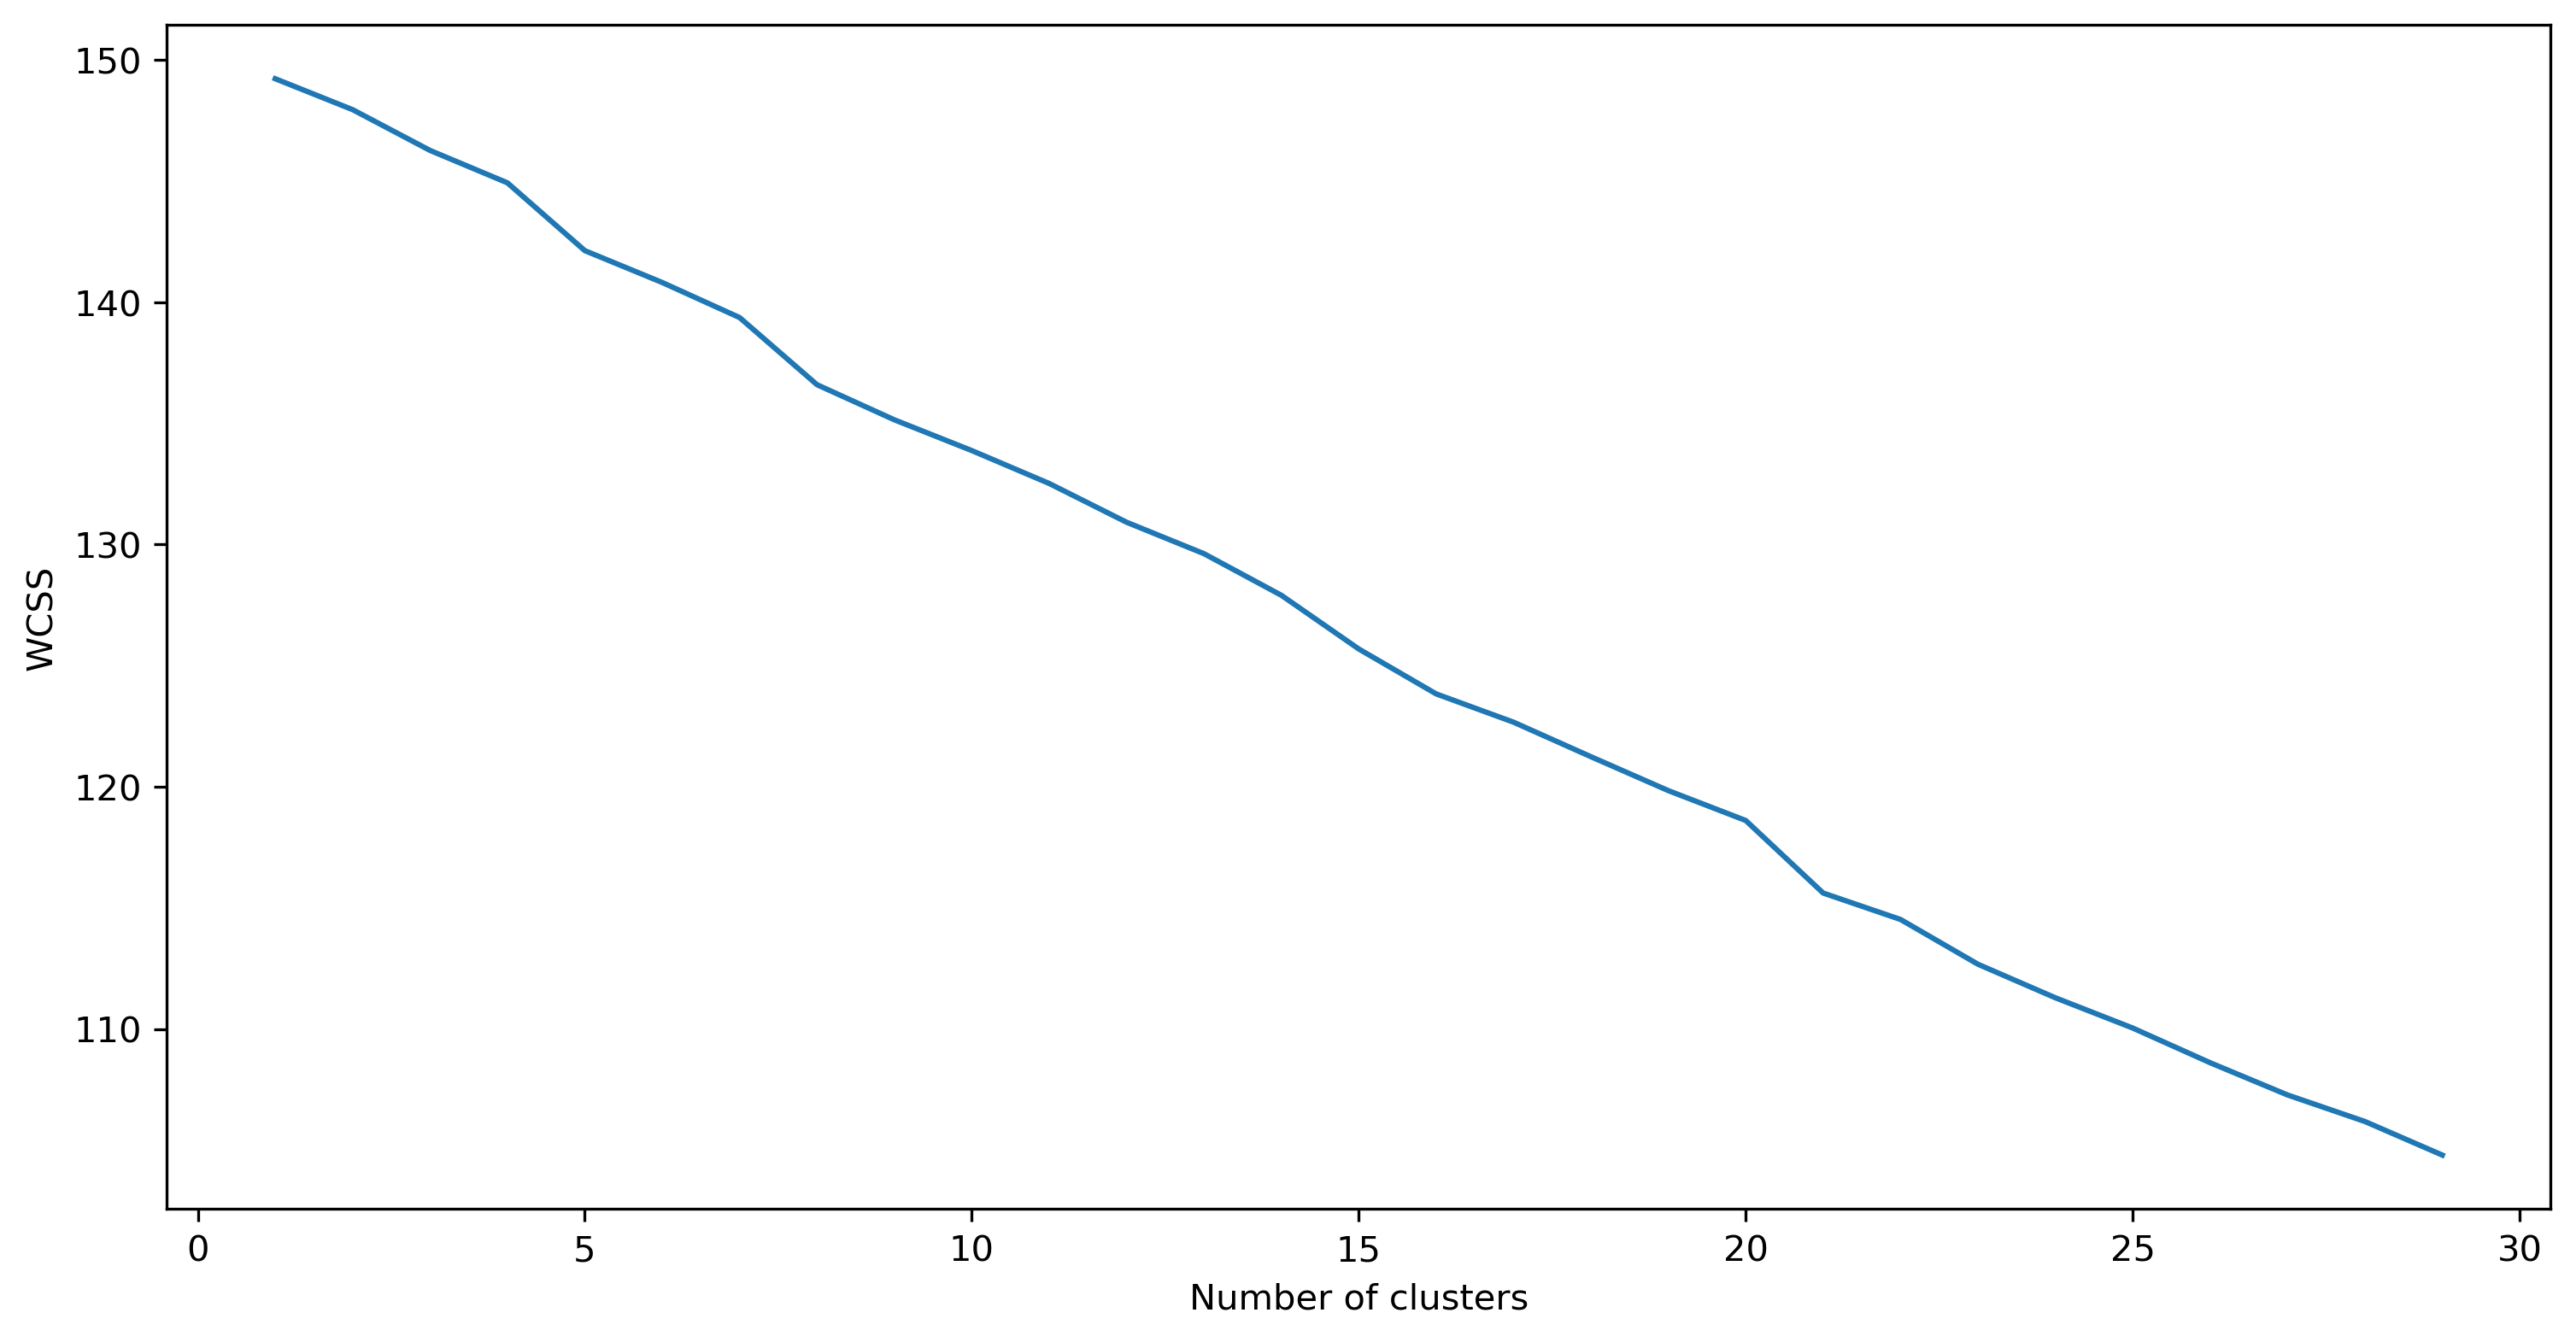

In [27]:
plt.plot(range(1, 30), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [9]:
# kmeans = KMeans(n_clusters = 20, init = "k-means++", random_state = 42)
# y_kmeans = kmeans.fit_predict(matrix)